In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import tensorflow as tf
import seaborn as sns
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers.experimental import preprocessing
from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
from tensorflow import keras
from tensorflow.keras import layers
import xgboost as xg 
from xgboost import XGBRegressor
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import time

In [2]:
car_details=pd.read_csv("car rental/Car details v3.csv")
car_details.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [3]:
car_details["name"].value_counts()

Maruti Swift Dzire VDI                 129
Maruti Alto 800 LXI                     82
Maruti Alto LXi                         71
BMW X4 M Sport X xDrive20d              62
Maruti Swift VDI                        61
                                      ... 
Hyundai Santro Xing XO eRLX Euro II      1
Hyundai Creta 1.6 CRDi AT S Plus         1
Hyundai Santro Xing GLS CNG              1
Hyundai Grand i10 1.2 CRDi Magna         1
Honda Civic 1.8 (E) MT                   1
Name: name, Length: 2058, dtype: int64

In [4]:
car_details.dropna(inplace=True)

In [5]:
car_details.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64

In [6]:
# car_details.drop_duplicates(inplace=True)

In [7]:
car_details[car_details["name"]=="Maruti 800 AC"].max().seats

4.0

In [8]:
car_data=pd.read_csv("car rental/car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
car_data["Car_Name"].value_counts()

city                   26
corolla altis          16
verna                  14
fortuner               11
brio                   10
                       ..
Bajaj Dominar 400       1
TVS Sport               1
Hero Super Splendor     1
800                     1
camry                   1
Name: Car_Name, Length: 98, dtype: int64

In [11]:
car_details2=pd.read_csv("car rental/CAR DETAILS FROM CAR DEKHO.csv")
car_details2.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [12]:
car_details2.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

In [13]:
car_details2["years"]=2021-car_details2["year"]

In [14]:
car_details2["years"].value_counts()

4     466
6     421
9     415
8     386
7     367
3     366
5     357
10    271
11    234
2     195
12    193
13    145
14    134
15    110
16     85
1      48
17     42
18     23
19     21
20     20
23     12
21     12
22     10
24      3
25      2
26      1
29      1
Name: years, dtype: int64

In [15]:
car_details2.drop("year",inplace=True,axis=1)
car_details2.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,years
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [16]:
car_details2["owner"].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [17]:
car_details2.replace("Test Drive Car",np.nan,inplace=True)
car_details2.dropna(axis=0,how="any",inplace=True)
car_details2.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,years
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7


In [18]:
import re
for i in list(car_details2["name"]):
    x=list(car_details[car_details["name"] == i].seats)
    if len(x)==0:
        print(x)
    else:
        car_details2.loc[car_details2['name'] == i, 'seats'] =  x[0]

# re.search( MyString2, MyString1 )

[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[]
[

In [19]:
car_details2.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,years,seats
0,Maruti 800 AC,60000,70000,Petrol,Individual,Manual,First Owner,14,4.0
1,Maruti Wagon R LXI Minor,135000,50000,Petrol,Individual,Manual,First Owner,14,5.0
2,Hyundai Verna 1.6 SX,600000,100000,Diesel,Individual,Manual,First Owner,9,5.0
3,Datsun RediGO T Option,250000,46000,Petrol,Individual,Manual,First Owner,4,5.0
4,Honda Amaze VX i-DTEC,450000,141000,Diesel,Individual,Manual,Second Owner,7,5.0


In [20]:
i=car_details[car_details["name"]=="Maruti 800 AC"].seats
list(i)[0]

4.0

In [21]:
car_details2.replace("",np.nan,inplace=True)
car_details2.dropna(axis=0,how="any",inplace=True)

In [22]:
car_details2["name"].duplicated().sum()

2528

In [23]:
car_details2["transmission"].value_counts()

Manual       3261
Automatic     270
Name: transmission, dtype: int64

In [24]:
car_details2.isna().sum()

name             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
years            0
seats            0
dtype: int64

In [25]:
cars=car_details2["name"].unique()

In [26]:
encode=LabelEncoder()
for j in ["fuel","seller_type","transmission","owner","name"]:
    car_details2[j]=encode.fit_transform(car_details2[j])
car_details2.head()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,years,seats
0,520,60000,70000,3,1,1,0,14,4.0
1,718,135000,50000,3,1,1,0,14,5.0
2,320,600000,100000,1,1,1,0,9,5.0
3,66,250000,46000,3,1,1,0,4,5.0
4,162,450000,141000,1,1,1,2,7,5.0


In [27]:
y=car_details2.iloc[:,1]
x=car_details2.drop("selling_price",inplace=False,axis=1)
y.head()

0     60000
1    135000
2    600000
3    250000
4    450000
Name: selling_price, dtype: int64

In [28]:
x.shape

(3531, 8)

In [29]:
car_details2.corr()

,name,selling_price,km_driven,fuel,seller_type,transmission,owner,years,seats
name,1.000000,-0.033674,0.136977,-0.083440,0.134600,0.086069,0.050278,0.073421,0.108730
selling_price,-0.033674,1.000000,-0.179010,-0.307971,-0.062967,-0.472049,-0.240317,-0.465860,0.293219
km_driven,0.136977,-0.179010,1.000000,-0.312377,0.095097,0.111545,0.312423,0.430852,0.210679
fuel,-0.083440,-0.307971,-0.312377,1.000000,0.051658,0.020530,-0.035716,0.098145,-0.358423
seller_type,0.134600,-0.062967,0.095097,0.051658,1.000000,0.124305,0.171500,0.072497,0.056706
transmission,0.086069,-0.472049,0.111545,0.020530,0.124305,1.000000,0.087177,0.128727,-0.018163
owner,0.050278,-0.240317,0.312423,-0.035716,0.171500,0.087177,1.000000,0.419832,0.010060
years,0.073421,-0.465860,0.430852,0.098145,0.072497,0.128727,0.419832,1.000000,-0.075816
seats,0.108730,0.293219,0.210679,-0.358423,0.056706,-0.018163,0.010060,-0.075816,1.000000


In [107]:
model=tf.keras.models.Sequential([tf.keras.layers.Dense(units=64,activation="linear")])
model.add(tf.keras.layers.Dense(units=32,activation="relu"))
model.add(tf.keras.layers.Dense(units=32,activation="linear"))
model.add(tf.keras.layers.Dense(units=16,activation="relu"))
model.add(tf.keras.layers.Dense(units=16,activation="linear"))
model.add(tf.keras.layers.Dense(activation="linear",units=8))
model.add(tf.keras.layers.Dense(activation="linear",units=1))

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=100)

In [47]:
# scaler=StandardScaler()
# #normalizer = preprocessing.Normalization()
# normalized_x = preprocessing.normalize(xtrain,axis=0)
# xtrain=scaler.fit_transform(xtrain)

# # xt = preprocessing.Normalization()
# # normalizer.adapt(np.array(x))

# # sns.distplot(normalized_x)

In [108]:
xtrain.astype("float32")

,name,km_driven,fuel,seller_type,transmission,owner,years,seats
2470,517.0,100000.0,1.0,1.0,1.0,2.0,12.0,8.0
475,133.0,149000.0,1.0,1.0,1.0,2.0,10.0,5.0
2655,959.0,200000.0,1.0,1.0,1.0,2.0,7.0,8.0
2392,689.0,55000.0,1.0,0.0,1.0,0.0,9.0,5.0
3101,22.0,66000.0,1.0,1.0,1.0,0.0,7.0,5.0
...,...,...,...,...,...,...,...,...
2403,506.0,140000.0,1.0,1.0,1.0,2.0,10.0,8.0
105,14.0,48000.0,1.0,0.0,0.0,0.0,9.0,5.0
2317,218.0,19571.0,1.0,0.0,1.0,0.0,3.0,5.0
3515,764.0,120000.0,1.0,1.0,1.0,3.0,7.0,5.0


In [109]:
xtrain.dtypes

name              int32
km_driven         int64
fuel              int32
seller_type       int32
transmission      int32
owner             int32
years             int64
seats           float64
dtype: object

In [119]:
model.compile(loss="mae",optimizer=
                      # tf.keras.optimizers.RMSprop()
              tf.keras.optimizers.Adam(0.01)
              ,metrics=['mae'])

In [120]:
# df.astype('int32').dtypes

model.fit(xtrain.astype("float32"),ytrain,epochs=200)

Epoch 1/200
83/83 [==============================] - 0s 2ms/step - loss: 273721.0938 - mae: 273721.0938
Epoch 2/200
83/83 [==============================] - 0s 2ms/step - loss: 221894.0938 - mae: 221894.0938
Epoch 3/200
83/83 [==============================] - 0s 2ms/step - loss: 215038.5938 - mae: 215038.5938
Epoch 4/200
83/83 [==============================] - 0s 3ms/step - loss: 225584.5625 - mae: 225584.5625
Epoch 5/200
83/83 [==============================] - 0s 5ms/step - loss: 214457.9531 - mae: 214457.9531
Epoch 6/200
83/83 [==============================] - 0s 5ms/step - loss: 224216.3125 - mae: 224216.3125
Epoch 7/200
83/83 [==============================] - 0s 5ms/step - loss: 224902.5469 - mae: 224902.5469
Epoch 8/200
83/83 [==============================] - 0s 4ms/step - loss: 224657.5156 - mae: 224657.5156
Epoch 9/200
83/83 [==============================] - 0s 2ms/step - loss: 209283.2188 - mae: 209283.2188
Epoch 10/200
83/83 [==============================] - 0s 2ms/ste

83/83 [==============================] - 0s 2ms/step - loss: 203508.5469 - mae: 203508.5469
Epoch 78/200
83/83 [==============================] - 0s 3ms/step - loss: 201666.2188 - mae: 201666.2188
Epoch 79/200
83/83 [==============================] - 0s 2ms/step - loss: 221556.6719 - mae: 221556.6719
Epoch 80/200
83/83 [==============================] - 0s 2ms/step - loss: 212629.3906 - mae: 212629.3906
Epoch 81/200
83/83 [==============================] - 0s 2ms/step - loss: 208188.3281 - mae: 208188.3281
Epoch 82/200
83/83 [==============================] - 0s 3ms/step - loss: 205331.0469 - mae: 205331.0469
Epoch 83/200
83/83 [==============================] - 0s 3ms/step - loss: 203444.3438 - mae: 203444.3438
Epoch 84/200
83/83 [==============================] - 0s 4ms/step - loss: 205087.6406 - mae: 205087.6406
Epoch 85/200
83/83 [==============================] - 0s 4ms/step - loss: 212621.0000 - mae: 212621.0000
Epoch 86/200
83/83 [==============================] - 0s 4ms/step - 

83/83 [==============================] - 0s 2ms/step - loss: 205092.6719 - mae: 205092.6719
Epoch 152/200
83/83 [==============================] - 0s 2ms/step - loss: 200418.7188 - mae: 200418.7188
Epoch 153/200
83/83 [==============================] - 0s 2ms/step - loss: 207869.8750 - mae: 207869.8750
Epoch 154/200
83/83 [==============================] - 0s 3ms/step - loss: 216414.4219 - mae: 216414.4219
Epoch 155/200
83/83 [==============================] - 0s 2ms/step - loss: 215957.1250 - mae: 215957.1250
Epoch 156/200
83/83 [==============================] - 0s 3ms/step - loss: 202324.6094 - mae: 202324.6094
Epoch 157/200
83/83 [==============================] - 0s 2ms/step - loss: 221573.5781 - mae: 221573.5781
Epoch 158/200
83/83 [==============================] - 0s 2ms/step - loss: 198389.2188 - mae: 198389.2188
Epoch 159/200
83/83 [==============================] - 0s 2ms/step - loss: 202628.4375 - mae: 202628.4375
Epoch 160/200
83/83 [==============================] - 0s 4m

In [121]:
# xtest = preprocessing.normalize(xtest,axis=0)
pred=model.predict(xtest.astype("float32"))

In [122]:
ytest.shape

(883,)

(array([432., 258., 116.,  35.,  17.,   6.,   6.,   3.,   1.,   1.,   2.,
          4.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   1.]),
 array([1.26679688e+02, 1.46800535e+05, 2.93474390e+05, 4.40148246e+05,
        5.86822101e+05, 7.33495956e+05, 8.80169812e+05, 1.02684367e+06,
        1.17351752e+06, 1.32019138e+06, 1.46686523e+06, 1.61353909e+06,
        1.76021294e+06, 1.90688680e+06, 2.05356065e+06, 2.20023451e+06,
        2.34690836e+06, 2.49358222e+06, 2.64025608e+06, 2.78692993e+06,
        2.93360379e+06, 3.08027764e+06, 3.22695150e+06, 3.37362535e+06,
        3.52029921e+06, 3.66697306e+06]),
 <BarContainer object of 25 artists>)

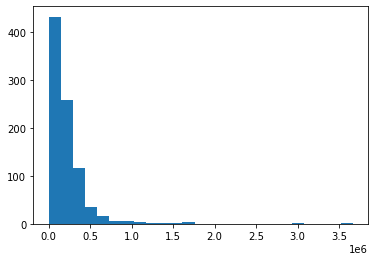

In [123]:
#sns.distplot((pred.flatten()-ytest),bins=30)
err=abs(pred.flatten()-ytest)
plt.hist(abs(pred.flatten()-ytest),bins=25)


In [124]:
x.name

0       520
1       718
2       320
3        66
4       162
       ... 
4335    402
4336    401
4337    522
4338    244
4339    786
Name: name, Length: 3531, dtype: int32

In [125]:
f=np.array([133,149000,1,1,1,2,10,5.0],)
f=f.reshape(1,8)
model.predict(f)

array([[387925.16]], dtype=float32)

In [126]:
f.shape

(1, 8)

In [127]:
ytrain

2470     290000
475      175000
2655    1200000
2392     350000
3101     305000
         ...   
2403     350000
105     2500000
2317     790000
3515     500000
1927      60000
Name: selling_price, Length: 2648, dtype: int64

In [128]:
err.mean()

209937.35292711615

In [129]:
min(err)

126.6796875

In [130]:
# cars=pd.DataFrame(cars)
# cars.to_csv("cars")

In [131]:
# !pip install tensorflowjs


In [132]:
import time
saved_model_path = "./{}.h5".format(int(time.time()))

model.save(saved_model_path)

!tensorflowjs_converter --input_format=keras {saved_model_path} ./

2021-05-05 23:41:44.145995: W tensorflow/stream_executor/platform/default/dso_loader.cc:59] Could not load dynamic library 'cudart64_101.dll'; dlerror: cudart64_101.dll not found
2021-05-05 23:41:44.146105: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
